In [48]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (10,8)

#### Problem 1.

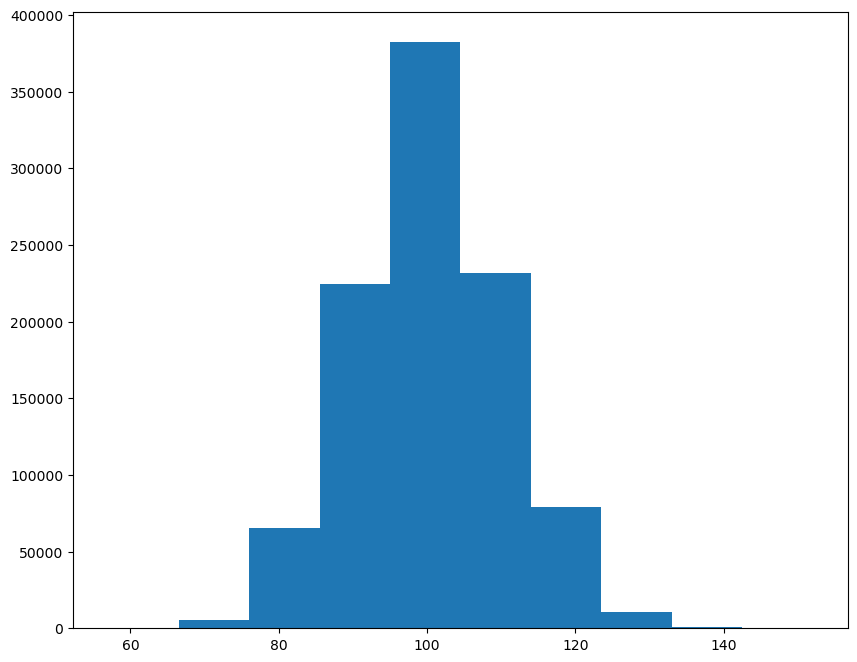

The 5 sigma threshold is 154.0


In [49]:
mu = 100

bkg = stats.poisson.rvs(mu, size=1000000)

p = stats.norm.sf(5)

five_sigma = stats.poisson.isf(p, mu)

plt.hist(bkg)
plt.show()
print(f'The 5 sigma threshold is {five_sigma}')

#### Problem 2.

#### a)

We want a very strong signal, so first we'll find the threshold for something greater than 8$\sigma$.

In [50]:
p = stats.norm.sf(8)
ten_sigma = stats.poisson.isf(p, mu)
print(f'The 10 sigma threshold is {ten_sigma}')

The 10 sigma threshold is 190.0


So we will use a value higher than 190, say 250.

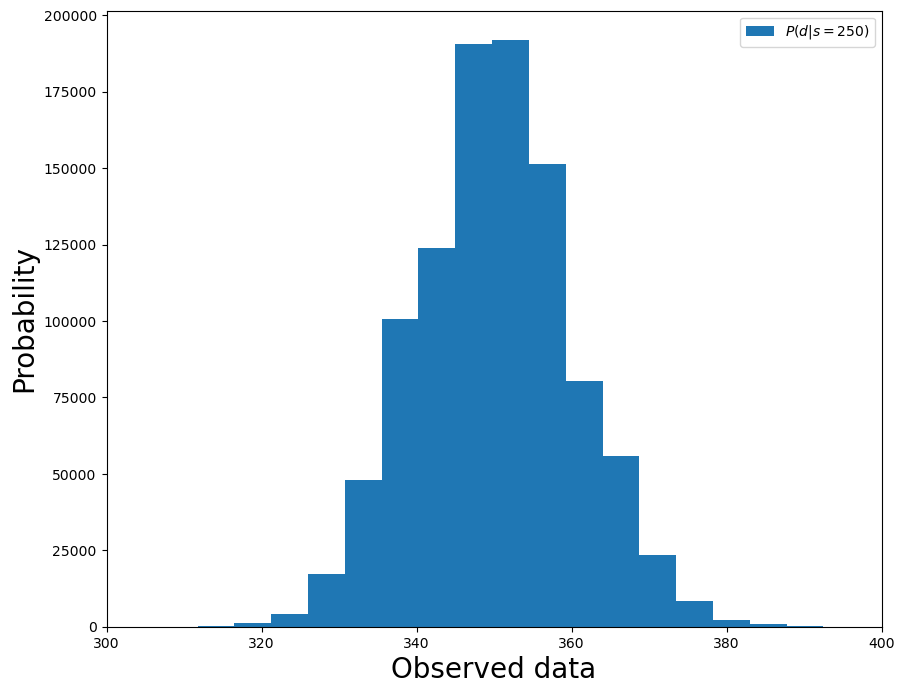

In [111]:
sig = 250
data = bkg + 250

fig,ax = plt.subplots()
ax.set_ylabel('Probability', fontsize=20)
ax.set_xlabel('Observed data', fontsize=20)
ax.hist(data, label='$P(d|s=250)$', bins=20)
plt.xlim(300,400)
plt.legend()
plt.show()

The distribution looks like it is a Poisson distribution a mean of 350, which is the mean of the signal-free distribution plus the value of the signal. This distribution shows that for any known signal, there are a range of data that would be possible to observe depending on the background. The signal effectively shifts the mean of the Poisson over by that amount.

#### b)

In [113]:
p_low = stats.poisson.sf(320, 350)
p_high = stats.poisson.cdf(380, 350)
print(p_low, p_high)

0.944168918536725 0.9469769143164257


The signal is biased, because since the background is a Poisson distribution it is always positive, so the observed data will always be higher than the signal. It isn't completely symmetric but it is very close, for example with a probabily of getting the mean plus or minus 30 differing only by around 0.3%.

#### Problem 3.

#### a)

We are simulating the same background with a range of possible true signals.

In [138]:
signal = stats.uniform.rvs(loc=0, scale=500, size=1000000)

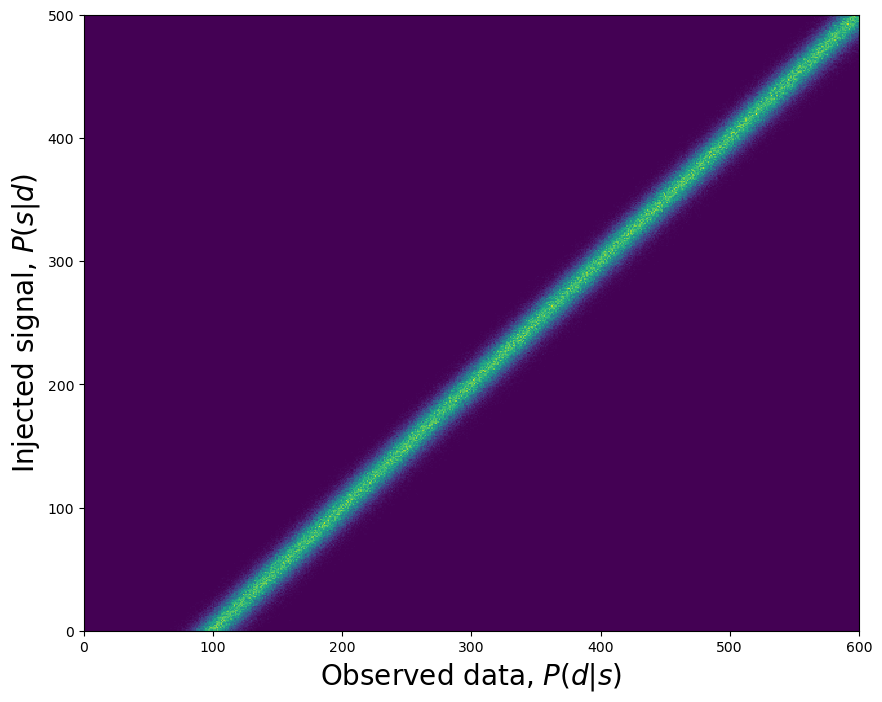

In [160]:
data = bkg + signal

signaledges = np.linspace(0,500,501)
dataedges = np.linspace(0,600,601)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading='auto')
plt.ylabel('Injected signal, $P(s|d)$', fontsize = 20)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 20)
plt.show()

#### b)

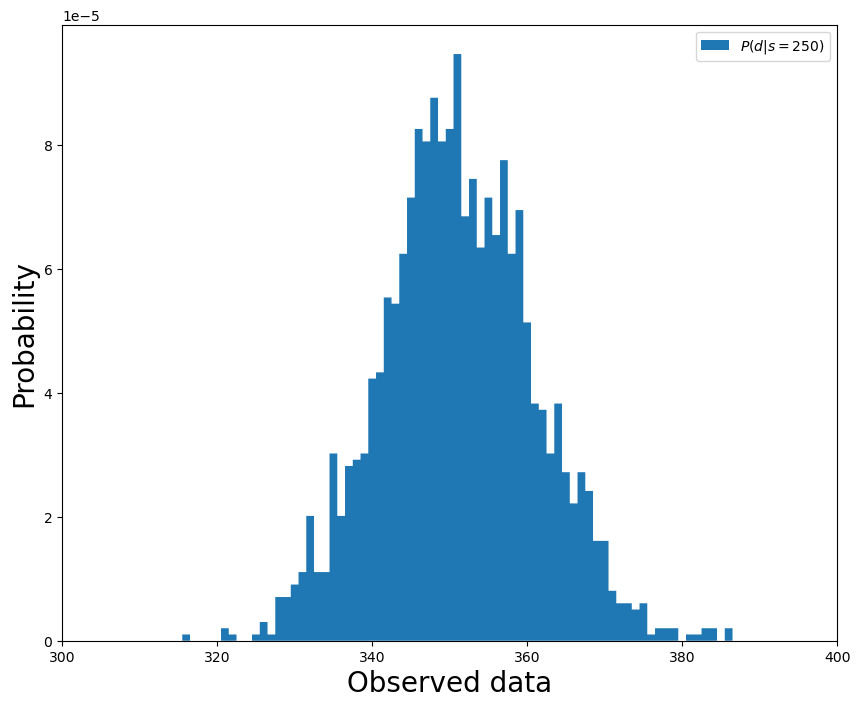

In [164]:
fig,ax = plt.subplots()
true = 250
ax.stairs(Psd[:-1,true],datacenters, label='$P(d|s=250)$', fill=True)

ax.set_ylabel('Probability', fontsize=20)
ax.set_xlabel('Observed data', fontsize=20)
plt.xlim(300,400)
plt.legend()
plt.show()

Other than the bin size, this distribution looks similar to the one from problem 2, with the same overall shape and mean.

#### c)

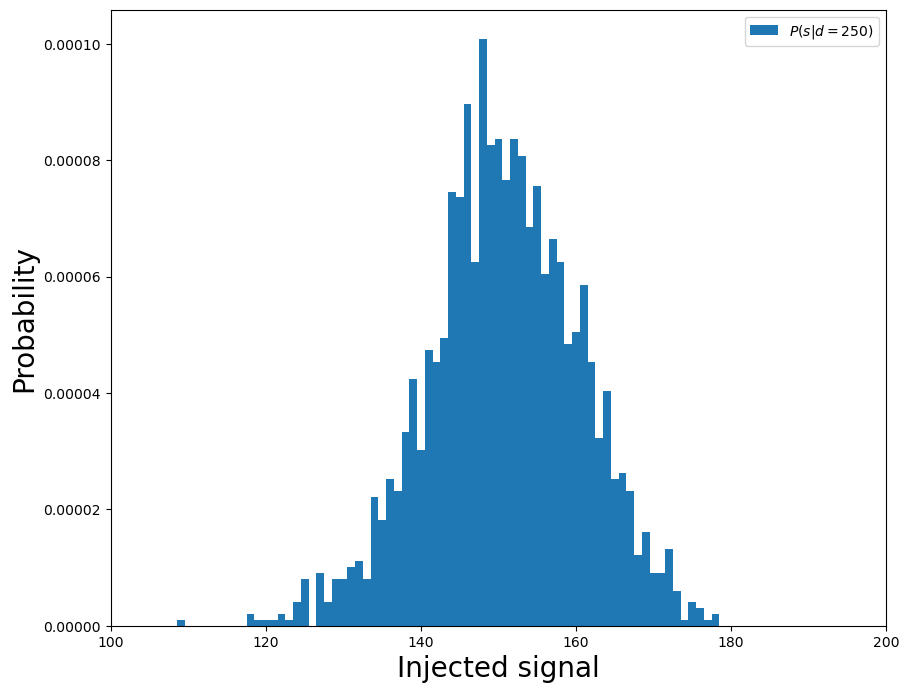

In [165]:
fig,ax = plt.subplots()
true = 250
ax.stairs(Psd[true, :-1],signalcenters, label='$P(s|d=250)$', fill=True)
ax.set_ylabel('Probability', fontsize=20)
ax.set_xlabel('Injected signal', fontsize=20)
plt.xlim(100,200)
plt.legend()
plt.show()

This plot shows that for some given data observed, in this case a value of 250, the probability for the possible different injected signal values.

#### d)

The true signal strength distribution is a Poisson distribution with a mean of around 150.

In [163]:
p = stats.norm.sf(1)
one_sigma = stats.poisson.isf(p, 150)
print(f'The 1 sigma threshold for the true signal is {one_sigma:0.0f}.')

The 1 sigma threshold for the true signal is 162.


#### e)

It is symmetric, but it is also biased but in the opposite direction as before. Now the signal will always be less than the observed data, becaue the observation is the signal plus the background, which is always a positive value. Since the mean of the background is 100, this means for the observation of 250, the most likely signal value is data - background = 150.